# Disk Plots

This notebook shows how to produce top-down view plots of the disk.

We will reuse the data from the `100_quickstart` example.
Let's make sure it existst.

In [1]:
import os
example_name = "100_quickstart"
if not os.path.basename(os.getcwd()) == example_name:
    if os.path.exists(example_name):
        os.chdir(example_name)
        if not os.path.exists("output/out/snapshots/list.txt"):
            raise FileNotFoundError(f"No snapshots found. Please run the simulation inside the 100_Quickstart.ipynb notebook first!")
    else:
        raise FileNotFoundError(f"Please go through the 100_Quickstart.ipynb notebook first!")
print(f"We are now in the directory {os.getcwd()}")

We are now in the directory /workspaces/1-Projects/fargocpt/examples/100_quickstart


## Plotting fields

The data is present in polar ($r-\varphi$) coordinates.
To plot the disk as a circular object, we can calculate the coordinates in cartesian coordinates and then use `pcolormesh` from `matplotlib`.

Below is a function to plot a field from the simulation output in such a way.

In [2]:
import numpy as np
import matplotlib.colors as mplcolors
import matplotlib.pyplot as plt

def plot_field(data, name, N, ax=None, dataunit=None, vmin=None, vmax=None, cmap="viridis", title=None):
    field = data.get(var=name, dim="2d", N=N)
    if dataunit is None:
        dataunit = field.data.unit
    C = field.data.to_value(dataunit)

    ri = field.grid.get_interfaces("r").to_value("au")
    phii = field.grid.get_interfaces("phi").to_value("rad")
    PHI, R = np.meshgrid(phii, ri)
    X = R*np.cos(PHI)
    Y = R*np.sin(PHI)

    if ax is None:
        fig, ax = plt.subplots(dpi=150)
    else:
        fig = ax.get_figure()

    norm = mplcolors.Normalize(vmin=vmin, vmax=vmax)

    # Hacky way to support arrays that are defined on the radial interfaces
    if C.shape[0] == X.shape[0]:
        C = C[:-1,:]

    pcm = ax.pcolormesh(X,Y,C, norm=norm, cmap=cmap)
    ax.set_aspect("equal")

    t = field.time.to_value("kyr")
    if title is None:
        title = ""
    else:
        title += "\n"
    title += f" t={t:.2e}kyr, N={N}"
    ax.set_title(title)

    cbar = fig.colorbar(pcm, ax=ax)
    cbar.set_label(f"{name} [{dataunit}]")
    
    return fig

Now, let's plot some fields.

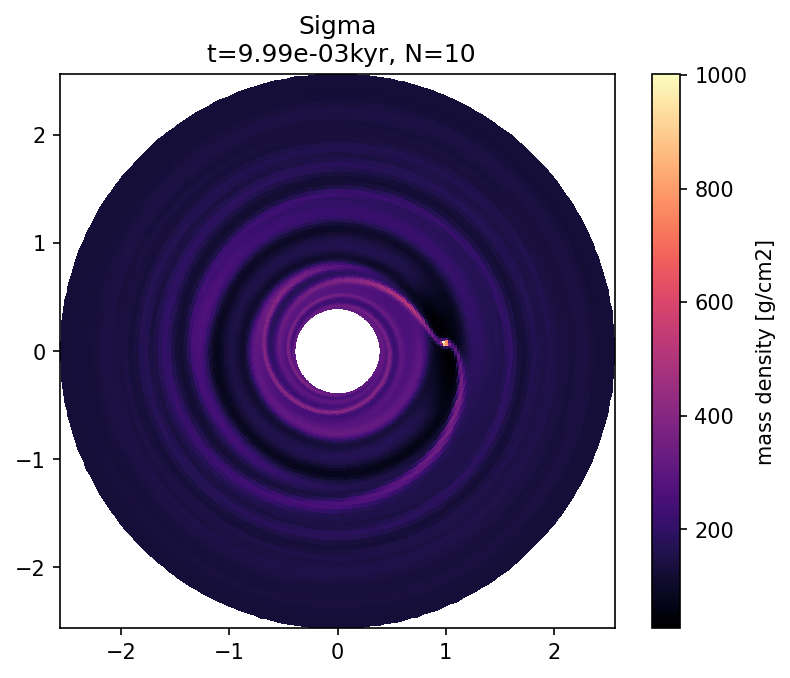

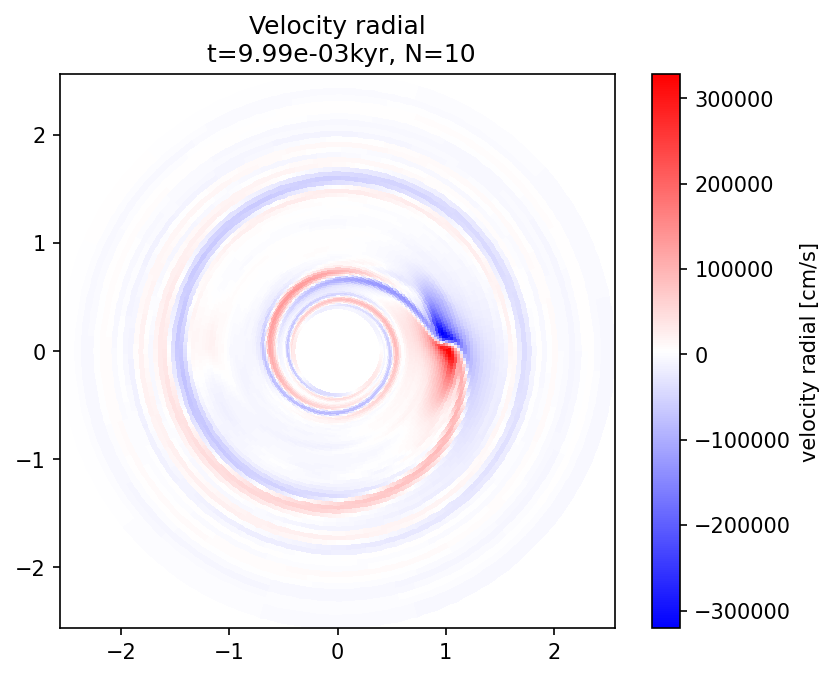

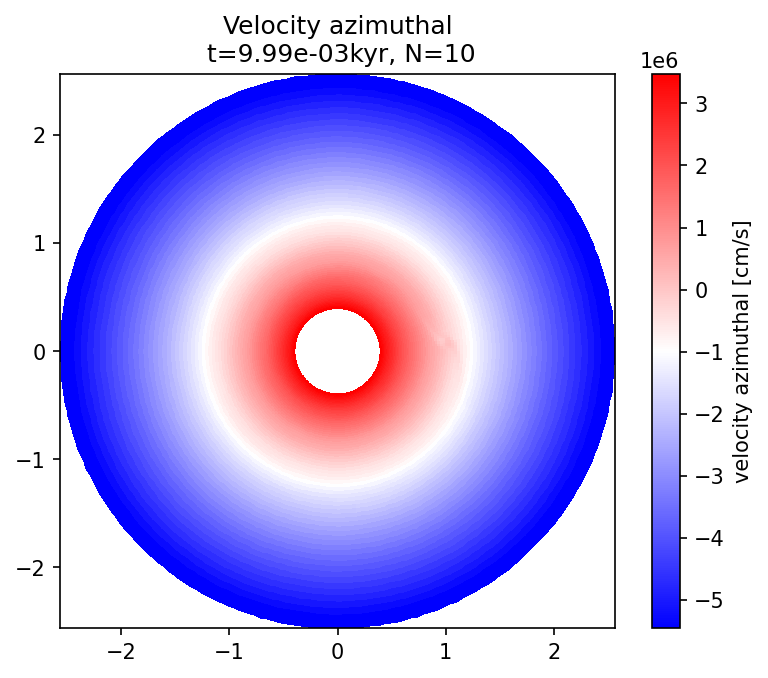

In [3]:
import disgrid
d = disgrid.Data("output/out/")
Nlast = d.avail()["Nlast"]
plot_field(d, "mass density", Nlast, dataunit="g/cm2", cmap="magma", title="Sigma");
plot_field(d, "velocity radial", Nlast, dataunit="cm/s", cmap="bwr", title="Velocity radial");
plot_field(d, "velocity azimuthal", Nlast, dataunit="cm/s", cmap="bwr", title="Velocity azimuthal");

## Using the overview widget

We can also use the overview widget.
Just remove the `rphi` in the variable descriptions as done below.

In [4]:
import sys
sys.path.append("../../Tools")
from overview import Overview

Run the next cell again to refresh the snapshot list.

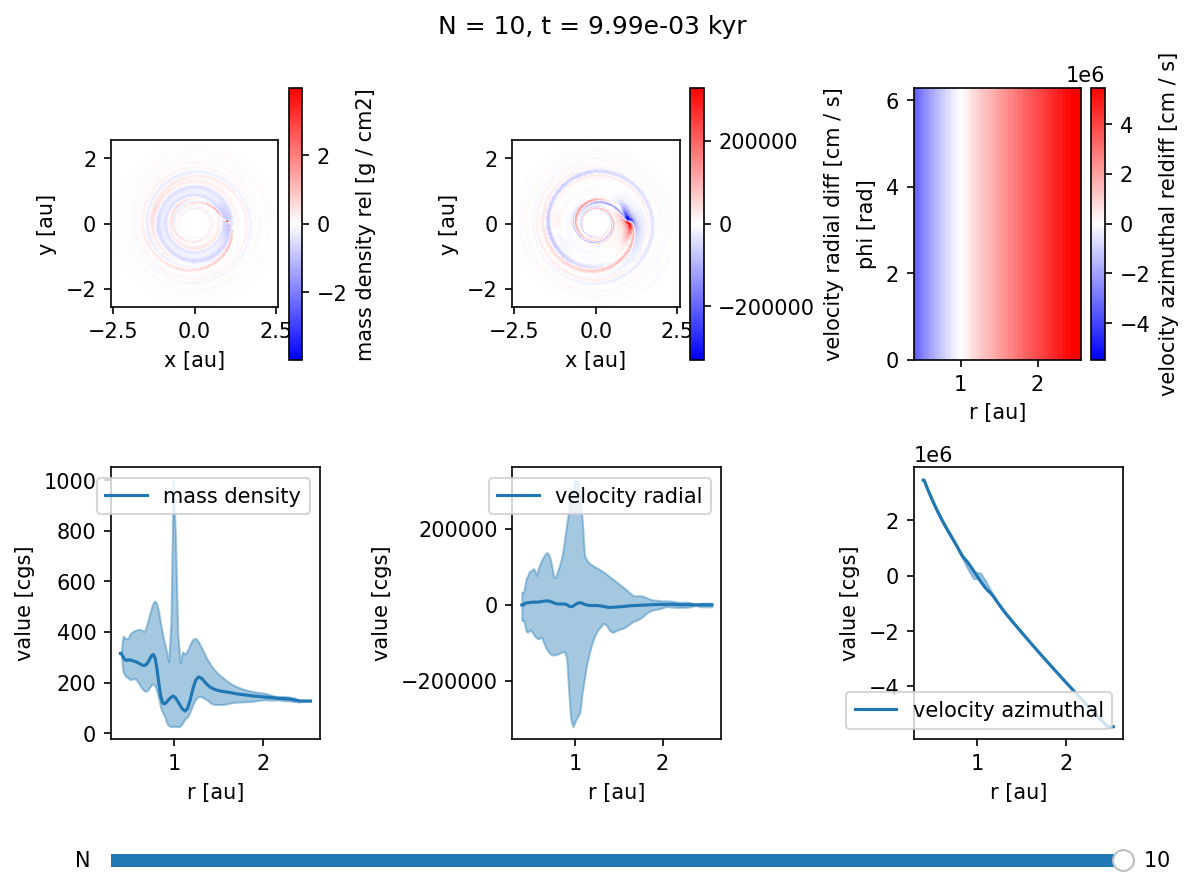

In [5]:
%matplotlib widget
overview = Overview("output/out/", 
                    vars=["2:mass density:rel",
                          "2:velocity radial:diff",
                          "2:velocity azimuthal:reldiff,rphi",
                          "1:mass density:minmax",
                          "1:velocity radial:minmax",
                          "1:velocity azimuthal:minmax"])
overview.create();